### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Importing dataframe

In [2]:
df_final = pd.read_pickle(r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis\02 Data\Prepared Data\final_complete.pkl')

In [3]:
df_final.shape

(29329778, 36)

In [4]:
pd.options.display.max_columns = None
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,region,exclusion_flag,age_group,income_range,department,day_of_week
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,snacks,Friday
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,snacks,Friday
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,meat & seafood,Thursday
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,bulk,Friday
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,Low-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,produce,Thursday


### 03. Comparing customer profiles with regions and departments

In [5]:
# Orders per department and region
crosstab_department_region = pd.crosstab(df_final['department'], df_final['region'], dropna = False)

In [6]:
crosstab_department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,31774,23253,45594,34289
babies,91346,69509,132985,97867
bakery,248209,189518,352990,273865
beverages,567084,439108,814379,617043
breakfast,148832,112799,212790,165837
bulk,7586,5370,10662,8380
canned goods,223777,166884,318438,245350
dairy & eggs,1152016,870292,1638420,1262473
deli,221302,168462,314796,242993


In [7]:
# Customer loyalty per department
crosstab_department_loyalty_flag = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna = False)

In [8]:
crosstab_department_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38084,23868,72958
babies,164126,40490,187091
bakery,374713,147974,541895
beverages,840154,341844,1255616
breakfast,219571,91954,328733
bulk,13595,3598,14805
canned goods,289296,154458,510695
dairy & eggs,1802165,646016,2475020
deli,317771,135362,494420


In [9]:
# Customer loyalty per region
crosstab_region_loyalty_flag = pd.crosstab(df_final['region'], df_final['loyalty_flag'], dropna = False)

In [10]:
crosstab_region_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2332082,976838,3565330
Northeast,1809855,723685,2644389
South,3345908,1370166,5049578
West,2617000,1059036,3835911


### 04. Customer profile statistics for usage frequency and expenditure

#### 04.1 Age groups

In [11]:
# Frequency and expenditure by age range
expend_age_group = df_final.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [12]:
expend_age_group

prices              
                mean  min      max
age_group                         
18-29      12.168069  1.0  99999.0
30-49      12.059082  1.0  99999.0
50-64      11.800338  1.0  99999.0
65+        11.730676  1.0  99999.0

In [15]:
# Removing outliers 
df_final.loc[df_final['prices'] > 100, 'prices'] = np.nan

In [17]:
expend_age_group_2 = df_final.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [18]:
expend_age_group_2

prices           
               mean  min   max
age_group                     
18-29      7.788116  1.0  25.0
30-49      7.798141  1.0  25.0
50-64      7.792042  1.0  25.0
65+        7.802128  1.0  25.0

#### 04.3 Income

In [19]:
# Frequency and expenditure by income
expend_income_range = df_final.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

In [20]:
expend_income_range

prices           
                     mean  min   max
income_range                        
100.000-150.000  7.962364  1.0  25.0
150.000-200.000  7.956923  1.0  25.0
200.000+         7.782073  1.0  25.0
25.000-50.000    6.712407  1.0  25.0
50.000-100.000   7.894964  1.0  25.0

#### 04.4 Day of the week

In [21]:
# Frequency and expenditure by day of the week
expend_day_week = df_final.groupby('day_of_week').agg({'prices': ['mean', 'min', 'max']})

In [22]:
expend_day_week

prices           
                 mean  min   max
day_of_week                     
Friday       7.863040  1.0  25.0
Monday       7.759974  1.0  25.0
Saturday     7.864295  1.0  25.0
Sunday       7.762291  1.0  25.0
Thursday     7.765798  1.0  25.0
Tuesday      7.764162  1.0  25.0
Wednesday    7.761705  1.0  25.0

#### 04.5 Family Status

In [23]:
# Frequency and expenditure by family status
expend_family_status = df_final.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

In [24]:
expend_family_status

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.807974  1.0  25.0
living with parents and siblings  7.806653  1.0  25.0
married                           7.795186  1.0  25.0
single                            7.789488  1.0  25.0

#### 04.6 Department

In [25]:
# Frequency and expenditure by department
expend_department = df_final.groupby('department').agg({'prices': ['mean', 'min', 'max']})

In [26]:
expend_department

prices           
                        mean  min   max
department                             
alcohol             8.154750  1.0  15.0
babies              7.630969  1.0  15.0
bakery              7.870313  1.0  15.0
beverages           7.686251  1.0  15.0
breakfast           8.067599  1.0  14.9
bulk                8.345778  1.4  14.1
canned goods        7.549342  1.0  15.0
dairy & eggs        8.354361  1.0  15.0
deli                7.787997  1.0  15.0
dry goods & pasta   7.345952  1.0  15.0
frozen              7.738708  1.0  15.0
household           7.375989  1.0  15.0
international       7.677667  1.0  15.0
meat & seafood     16.301529  8.0  25.0
missing             8.658709  1.0  15.0
other               6.954694  1.1  15.0
pantry              8.016246  1.0  20.0
personal care       8.003253  1.0  15.0
pets                7.885548  1.0  15.0
produce             7.980883  1.0  15.0
snacks              4.275461  1.6   7.0

#### 04.7 Region

In [27]:
# Frequency and expenditure by region
expend_region = df_final.groupby('region').agg({'prices': ['mean', 'min', 'max']})

In [28]:
expend_region

prices           
               mean  min   max
region                        
Midwest    7.796798  1.0  25.0
Northeast  7.786969  1.0  25.0
South      7.800122  1.0  25.0
West       7.795709  1.0  25.0

### 05. Further visualizations

In [31]:
# Visualizing order by age and income range
# Creating a crosstab for age group and income range
crosstab_income = pd.crosstab(df_final['age_group'], df_final['income_range'], dropna = False).sort_index()

In [32]:
crosstab_income

income_range,100.000-150.000,150.000-200.000,200.000+,25.000-50.000,50.000-100.000
age_group,,,,,
18-29,122489,33742,19851,847877,4487111
30-49,2236560,779917,77057,1101987,5023457
50-64,3433976,1250202,68808,584784,1500613
65+,3976000,1385938,77631,636620,1685158


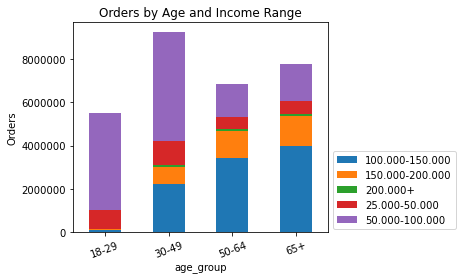

In [33]:
bar_crosstab_income = crosstab_income.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Age and Income Range')
plt.ylabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [35]:
# Exporting the chart
# Creating a path
path = r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis'

In [36]:
bar_crosstab_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_age_group_4.10.png'))

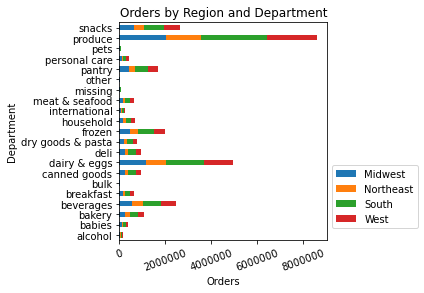

In [37]:
# Visualizing orders by departments and region
# I already did the crosstab in Part 3 of this notebook
bar_crosstab_department_region = crosstab_department_region.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Department')
plt.ylabel('Department')
plt.xlabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')

In [38]:
# Exporting the chart
bar_crosstab_department_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_department_4.10.png'))

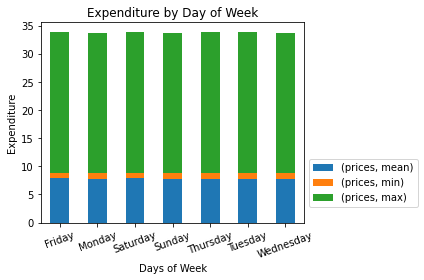

In [40]:
# Visualizing expenditure by days of the week
bar_expend_day_week = expend_day_week.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Expenditure by Day of Week')
plt.ylabel('Expenditure')
plt.xlabel('Days of Week')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [41]:
# Exporting the chart
bar_expend_day_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_expend_day_week_4.10.png'))

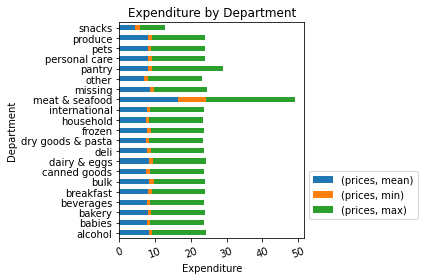

In [45]:
# Visualizing expenditure by department
bar_expend_department = expend_department.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Expenditure by Department')
plt.ylabel('Department')
plt.xlabel('Expenditure')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()

In [46]:
# Exporting the chart
bar_expend_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_expend_department_4.10.png'))

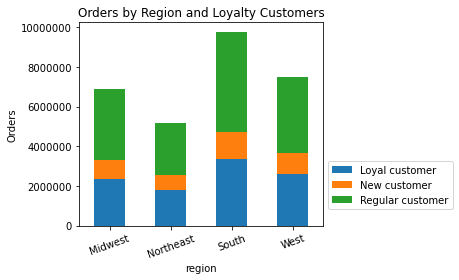

In [47]:
# Visualizing orders by region and customer loyalty

bar_crosstab_region_loyalty = crosstab_region_loyalty_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Loyalty Customers')
plt.ylabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [48]:
# Exporting the chart
bar_crosstab_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_loyalty_4.10.png'))

In [50]:
# Visualizing orders by age and family status
# Creating a crosstab for family status and age group (I already did this, but in another notebook)
crosstab_family_status_age = pd.crosstab(df_final['family_status'], df_final['age_group'], dropna = False)

In [51]:
crosstab_family_status_age

age_group,18-29,30-49,50-64,65+
family_status,,,,
divorced/widowed,0,0,591048,1915420
living with parents and siblings,1404015,0,0,0
married,2736556,6920907,5090540,5845927
single,1370499,2298071,1156795,0


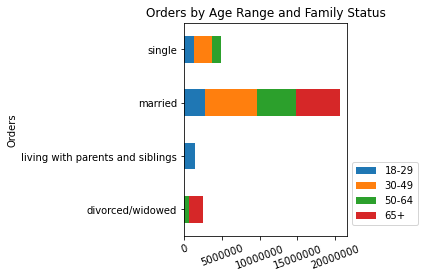

In [52]:
bar_crosstab_family_status_age = crosstab_family_status_age.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Age Range and Family Status')
plt.ylabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')

In [53]:
# Exporting the chart
bar_crosstab_family_status_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status_age_4.10.png'))

### 07. Exporting the dataframe

In [54]:
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_complete_end.pkl'))